In [1]:

import tweepy 
import pandas as pd
import sys
import csv
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from PIL import Image
import pandas_profiling
import twitter
#api = twitter.Api(consumer_key='consumer_key',consumer_secret='consumer_secret',
#access_token_key='access_token',access_token_secret='access_token_secret')
#api = twitter.Api(consumer_key='YLSBZeZ5ytLD8u1ZLgmWs7jeU',
                   #   consumer_secret='zVO69K86YtEkODZOiAe53p0F1Qkogh4BrPAIEw8vfjRuk4ptdO',
                 #     access_token_key='1117266834653241346-3VBwsLFoSsHu4Rm7bVlERRmDun4UED',
                    #  access_token_secret='8QboAOWWEVWYgyP8Dh16CoDjakXpp1FkcU4AKY1MbuGgP')
  

def get_tweets(username): 
          
       
        auth = tweepy.OAuthHandler('YLSBZeZ5ytLD8u1ZLgmWs7jeU', 'zVO69K86YtEkODZOiAe53p0F1Qkogh4BrPAIEw8vfjRuk4ptdO') 
  
    
        auth.set_access_token('1117266834653241346-3VBwsLFoSsHu4Rm7bVlERRmDun4UED', '8QboAOWWEVWYgyP8Dh16CoDjakXpp1FkcU4AKY1MbuGgP') 
 
        api = tweepy.API(auth) 
   
       
        tfile = []
        for tweet in tweepy.Cursor(api.user_timeline, screen_name = username).items():
            tfile.append([len(tweet.text), username, tweet.id_str,tweet.source, tweet.created_at,tweet.retweet_count,tweet.favorite_count, tweet.text.encode("utf-8")])

	
        outfile = username + "_tweets_V14.csv"
        print ("writing to " + outfile)
        with open(outfile, 'w+') as file:
            writer = csv.writer(file, delimiter=',')
            writer.writerow(['len','User_Name', 'Tweet_ID', 'Source', 'Created_date','Retweet_count','Favorite_count','Text',])
            writer.writerows(tfile)

get_tweets("@netmediatama")  

writing to @netmediatama_tweets_V14.csv


In [2]:

import tweepy 
import pandas as pd
import sys
import csv
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from PIL import Image
import pandas_profiling
import twitter
import numpy as np
import nltk
import warnings 

import string

bg= pd.read_csv("@netmediatama_tweets_V14.csv",encoding='utf-8') 
bg.head()


,len,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Text
0,140,@netmediatama,1162974910316105728,Twitter Media Studio,2019-08-18 06:30:00,1,9,b'Ada kisah inspiratif dari para juara di Ruan...
1,47,@netmediatama,1162970848019374080,Twitter for Android,2019-08-18 06:13:51,0,4,b'#nontonTVasiknyadiNET \xf0\x9f\x98\x8a https...
2,140,@netmediatama,1162970777529905153,Twitter for Android,2019-08-18 06:13:34,1,8,"b'Oke, gak akan diingatin kok kalo besok adala..."
3,51,@netmediatama,1162970568766832640,Twitter for Android,2019-08-18 06:12:45,0,6,"b'Wohooo, kondangan maniaaaa? https://t.co/db6..."
4,34,@netmediatama,1162970195096268802,Twitter for Android,2019-08-18 06:11:16,0,4,b'Gegayaan \xf0\x9f\x98\x82 https://t.co/euDN3...


In [3]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [4]:

bg['tidy_tweet'] = np.vectorize(remove_pattern)(bg['Text'], "@[\w]*")
bg['tidy_tweet'] = bg['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
bg['tidy_tweet'] = bg['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
bg.head()


,len,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Text,tidy_tweet
0,140,@netmediatama,1162974910316105728,Twitter Media Studio,2019-08-18 06:30:00,1,9,b'Ada kisah inspiratif dari para juara di Ruan...,kisah inspiratif dari para juara Ruangguru nGi...
1,47,@netmediatama,1162970848019374080,Twitter for Android,2019-08-18 06:13:51,0,4,b'#nontonTVasiknyadiNET \xf0\x9f\x98\x8a https...,#nontonTVasiknyadiNET https ihBm
2,140,@netmediatama,1162970777529905153,Twitter for Android,2019-08-18 06:13:34,1,8,"b'Oke, gak akan diingatin kok kalo besok adala...",akan diingatin kalo besok adalah hari senin mu...
3,51,@netmediatama,1162970568766832640,Twitter for Android,2019-08-18 06:12:45,0,6,"b'Wohooo, kondangan maniaaaa? https://t.co/db6...",Wohooo kondangan maniaaaa https JdiRy
4,34,@netmediatama,1162970195096268802,Twitter for Android,2019-08-18 06:11:16,0,4,b'Gegayaan \xf0\x9f\x98\x82 https://t.co/euDN3...,Gegayaan https euDN


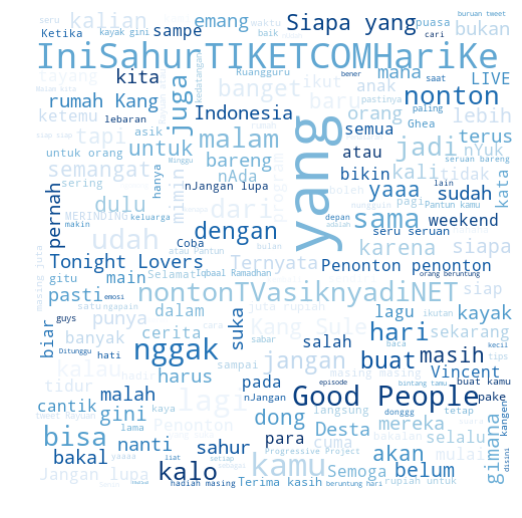

In [5]:
#allWords = as.data.frame(table(bigWords$Words))
text = ' '.join([text for text in bg['tidy_tweet']])

from wordcloud import WordCloud



#wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_words)
#wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(width=480, height=480, background_color="white", colormap="Blues", stopwords=["https"]).generate(text)

#wordcloud = WordCloud(width=480, height=480, max_words=2).generate(text)


plt.figure(figsize=(20, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 

plt.show()